# 0º Passo: Vamos importar as Bibliotecas necessárias

In [2]:
 # Importação de Bibliotecas que serão usadas no desafio

import pandas as pd
import numpy as np

#Visualização Gráfica com Matplotlib e Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.gridspec import GridSpec
pd.set_option('display.max_columns', 100)

#Visualização Interativa com Plotly
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go

# Para fazer acessos Web, API e JSON
import json
import requests

import folium
from folium.plugins import FastMarkerCluster, Fullscreen, MiniMap, HeatMap, HeatMapWithTime, LocateControl
from collections import Counter
from PIL import Image

In [1]:
pip install folium --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: folium
    Found existing installation: folium 0.19.5
    Uninstalling folium-0.19.5:
      Successfully uninstalled folium-0.19.5


# 1º PREPARAÇÃO DOS DADOS: Uma vez carregada a pasta de arquivos para o Google drvie, vamos  fazer o import dele para o colab


**1.1 - Importação dos arquivos csv do dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Antes de mergulharmos na análise exploratória, vamos dar uma olhada nos dados para entender melhor com o que estamos lidando. Esse primeiro contato é fundamental para seguir nos próximos passos.

In [16]:
# Essa parte do código está fazendo a leitura dos arquivos CSV individuais que estão na pasta

raw_path = '/content/drive/MyDrive/dataset_olist/'

olist_product = pd.read_csv(raw_path + 'olist_products_dataset.csv')
olist_order_payments = pd.read_csv(raw_path + 'olist_order_payments_dataset.csv')
olist_order_reviews_dataset = pd.read_csv(raw_path + 'olist_order_reviews_dataset.csv')
olist_order_items = pd.read_csv(raw_path + 'olist_order_items_dataset.csv')
olist_orders_dataset = pd.read_csv(raw_path + 'olist_orders_dataset.csv')
olist_products = pd.read_csv(raw_path + 'olist_products_dataset.csv')
olist_customers = pd.read_csv(raw_path + 'olist_customers_dataset.csv')
olist_geolocation = pd.read_csv(raw_path + 'olist_geolocation_dataset.csv')
olist_sellers = pd.read_csv(raw_path + 'olist_sellers_dataset.csv')

Um passo importante antes de  montar um dataset completo com todas as informações úteis, é importante ver como cada parte está organizada. Isso vai facilitar bastante na hora de fazer a análise exploratória de dados.

In [17]:
# Nesta célula será importada a biblioteca "os" que serve para importar o módulo "os". Este fornce várias funções para interagir com o sistema operacional e navegar também no sistema de arquivos.
# Nesta célula vamos escrever o código que servirá para carregar automaticamente todos os arquivos CSV contidos em uma pasta específica.
import os
import pandas as pd

def carregar_todos_csvs(pasta_csv):
    dados = {}
    if not os.path.isdir(pasta_csv):
        print(f"A pasta {pasta_csv} não existe.")
        return dados

    for arquivo in os.listdir(pasta_csv):
        if arquivo.endswith('.csv'):
            caminho_arquivo = os.path.join(pasta_csv, arquivo)
            dados[arquivo.replace('.csv', '')] = pd.read_csv(caminho_arquivo)
    return dados

# Caminho da pasta no Google Drive
pasta = '/content/drive/MyDrive/dataset_olist'

# Carregar todos os CSVs da pasta
dados = carregar_todos_csvs(pasta)

# Essa parte do código servirá para exibir nomes dos datasets carregados

print("Arquivos CSV carregados:")
for nome in dados.keys():
    print(f"- {nome}")


Arquivos CSV carregados:
- olist_customers_dataset
- olist_geolocation_dataset
- olist_order_items_dataset
- olist_order_reviews_dataset
- olist_order_payments_dataset
- olist_sellers_dataset
- olist_orders_dataset
- product_category_name_translation
- olist_products_dataset


In [21]:
# Nesta célula vamos Verificar e visualizar os datasets carregados automaticamente
import pandas as pd

# Também criaremos  lista de nomes e datasets a partir do dicionário "dados"
names = list(dados.keys())
datasets = list(dados.values())

# Criação de um DataFrame com informações úteis sobre os datasets
data_info = pd.DataFrame({})
data_info['dataset'] = names
data_info['n_rows'] = [df.shape[0] for df in datasets]
data_info['n_cols'] = [df.shape[1] for df in datasets]
data_info['null_amount'] = [df.isnull().sum().sum() for df in datasets]
data_info['qty_null_columns'] = [sum(df.isnull().any()) for df in datasets]
data_info['null_columns'] = [
    ', '.join([col for col in df.columns if df[col].isnull().any()]) for df in datasets
]

# Essa parte vai exibir os dados com uma leitura melhor
data_info.style.background_gradient(cmap='viridis')


,dataset,n_rows,n_cols,null_amount,qty_null_columns,null_columns
0,olist_customers_dataset,99441,5,0,0,
1,olist_geolocation_dataset,1000163,5,0,0,
2,olist_order_items_dataset,112650,7,0,0,
3,olist_order_reviews_dataset,99224,7,145903,2,"review_comment_title, review_comment_message"
4,olist_order_payments_dataset,103886,5,0,0,
5,olist_sellers_dataset,3095,4,0,0,
6,olist_orders_dataset,99441,8,4908,3,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
7,product_category_name_translation,71,2,0,0,
8,olist_products_dataset,32951,9,2448,8,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"


**ANÁLISE DA QUALIDADE DOS DADOS:**

Antes de partirmos para a limpeza dos dados, precisamos avaliar a qualidade dos dados, e identificar quais colunas e registros precisam de tratamento:

In [34]:
import pandas as pd

# Abaixo o caminho do dataset no Google Drive
path = '/content/drive/MyDrive/dataset_olist/'

# Carregamento dos datasets CSV
olist_customers = pd.read_csv(path + 'olist_customers_dataset.csv')
olist_geolocation = pd.read_csv(path + 'olist_geolocation_dataset.csv')
olist_order_items = pd.read_csv(path + 'olist_order_items_dataset.csv')
olist_order_reviews = pd.read_csv(path + 'olist_order_reviews_dataset.csv')
olist_order_payments = pd.read_csv(path + 'olist_order_payments_dataset.csv')
olist_sellers = pd.read_csv(path + 'olist_sellers_dataset.csv')
olist_orders = pd.read_csv(path + 'olist_orders_dataset.csv')
olist_products = pd.read_csv(path + 'olist_products_dataset.csv')

datasets = [
    olist_customers,
    olist_geolocation,
    olist_order_items,
    olist_order_reviews,
    olist_order_payments,
    olist_sellers,
    olist_orders,
    olist_products
]

names = [
    'olist_customer',
    'olist_geolocation',
    'olist_order_items',
    'olist_order_reviews',
    'olist_order_payments',
    'olist_sellers',
    'olist_orders',
    'olist_products'
]

def data_overview(df):
    overview = []
    for col in df.columns:
        qtd_null = df[col].isnull().sum()
        percent_null = qtd_null / len(df)
        dtype = df[col].dtype
        qtd_cat = df[col].nunique() if dtype == 'object' else 0
        overview.append({
            'feature': col,
            'qtd_null': qtd_null,
            'percent_null': percent_null,
            'dtype': dtype,
            'qtd_cat': qtd_cat
        })
    return pd.DataFrame(overview)

dfs_overview_list = []

for name, df in zip(names, datasets):
    overview_df = data_overview(df)
    overview_df['dataset_name'] = name
    dfs_overview_list.append(overview_df)

# Caminho para Concatenar mantendo índices originais
df_overview = pd.concat(dfs_overview_list, ignore_index=False)

# Função para resetar índice dentro de cada grupo
def reset_index_group(df):
    return df.reset_index(drop=True)

# É necessário resetar o índice para cada dataset_name
df_overview = df_overview.groupby('dataset_name').apply(reset_index_group)

# RVamos remover o índice extra criado pelo groupby
df_overview.index = df_overview.index.droplevel(0)

# Ordenar colunas
df_overview = df_overview.loc[:, ['dataset_name', 'feature', 'qtd_null', 'percent_null', 'dtype', 'qtd_cat']]

# Mostrar resultado
print(df_overview)


           dataset_name                        feature  qtd_null  \
0        olist_customer                    customer_id         0   
1        olist_customer             customer_unique_id         0   
2        olist_customer       customer_zip_code_prefix         0   
3        olist_customer                  customer_city         0   
4        olist_customer                 customer_state         0   
0     olist_geolocation    geolocation_zip_code_prefix         0   
1     olist_geolocation                geolocation_lat         0   
2     olist_geolocation                geolocation_lng         0   
3     olist_geolocation               geolocation_city         0   
4     olist_geolocation              geolocation_state         0   
0     olist_order_items                       order_id         0   
1     olist_order_items                  order_item_id         0   
2     olist_order_items                     product_id         0   
3     olist_order_items                      sel

<ipython-input-34-a9c9d8a4f1d8>:69: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



# **LIMPEZA DE DADOS:**

**Nesta célula abaixo, temos um  código que realiza uma análise inicial dos datasets carregados, gerando um resumo detalhado das colunas de cada tabela. Foram calculados a quantidade e percentual de valores nulos, o tipo de dado e a quantidade de categorias distintas para colunas categóricas. Com esse panorama, será possível orientar as etapas seguintes de limpeza e exploração dos dados.

In [32]:
# Aqui temos uma unção para criar resumo dos dados
def gerar_resumo_colunas(df):
    resumo = []
    for coluna in df.columns:
        total_nulos = df[coluna].isnull().sum()
        percentual_nulos = total_nulos / len(df)
        tipo_dado = df[coluna].dtype
        if tipo_dado == 'object':
            categorias = df[coluna].nunique()
        else:
            categorias = 0
        resumo.append({
            'feature': coluna,
            'qtd_null': total_nulos,
            'percent_null': percentual_nulos,
            'dtype': tipo_dado,
            'qtd_cat': categorias
        })
    return pd.DataFrame(resumo)

# Abaixo usamos as variáveis corretas para nomes e datasets
lista_resumos = []
for nome, df in zip(names, datasets):
    resumo_atual = gerar_resumo_colunas(df)
    resumo_atual['dataset_name'] = nome
    lista_resumos.append(resumo_atual)

resumo_final = pd.concat(lista_resumos, ignore_index=True)

resumo_final = resumo_final.groupby('dataset_name').apply(lambda x: x.reset_index(drop=True))
resumo_final.index = resumo_final.index.droplevel(0)

print(resumo_final.head(20))


                       feature  qtd_null  percent_null    dtype  qtd_cat  \
0                  customer_id         0           0.0   object    99441   
1           customer_unique_id         0           0.0   object    96096   
2     customer_zip_code_prefix         0           0.0    int64        0   
3                customer_city         0           0.0   object     4119   
4               customer_state         0           0.0   object       27   
0  geolocation_zip_code_prefix         0           0.0    int64        0   
1              geolocation_lat         0           0.0  float64        0   
2              geolocation_lng         0           0.0  float64        0   
3             geolocation_city         0           0.0   object     8011   
4            geolocation_state         0           0.0   object       27   
0                     order_id         0           0.0   object    98666   
1                order_item_id         0           0.0    int64        0   
2           

<ipython-input-32-75047f05a00e>:30: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



# **LIMPEZA DE DADOS:**

In [35]:
import pandas as pd

# Dados é o dicionário com os DataFrames carregados

for nome, df in dados.items():
    print(f"Tratando dataset: {nome}")

    # Remover duplicatas
    dados[nome] = df.drop_duplicates()

    # Converter colunas que contêm 'date' ou 'timestamp' para datetime, se existirem
    for col in dados[nome].columns:
        if 'date' in col.lower() or 'timestamp' in col.lower():
            dados[nome][col] = pd.to_datetime(dados[nome][col], errors='coerce')

    # Tratar valores nulos em colunas categóricas (objetos/string)
    categorical_cols = dados[nome].select_dtypes(include=['object']).columns
    for col in categorical_cols:
        dados[nome][col] = dados[nome][col].fillna('indisponível')

    # Tratar valores nulos em colunas numéricas (int, float)
    numeric_cols = dados[nome].select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        dados[nome][col] = dados[nome][col].fillna(0)

    # Mostrar resumo após limpeza
    print(f"- Linhas após remover duplicatas: {len(dados[nome])}")
    print(f"- Valores nulos após tratamento:\n{dados[nome].isnull().sum()}")
    print('-'*40)


Tratando dataset: olist_customers_dataset
- Linhas após remover duplicatas: 99441
- Valores nulos após tratamento:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
----------------------------------------
Tratando dataset: olist_geolocation_dataset
- Linhas após remover duplicatas: 738332
- Valores nulos após tratamento:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
----------------------------------------
Tratando dataset: olist_order_items_dataset
- Linhas após remover duplicatas: 112650
- Valores nulos após tratamento:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
--------------------------------------

In [36]:
# Para verificar e conferir a operação anterior

for nome, df in dados.items():
    print(f"dataset_olist: {nome}")
    print(f"- Linhas duplicadas: {df.duplicated().sum()}")
    print(f"Valores nulos:\n{df.isnull().sum()}")

dataset_olist: olist_customers_dataset
- Linhas duplicadas: 0
Valores nulos:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
dataset_olist: olist_geolocation_dataset
- Linhas duplicadas: 0
Valores nulos:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
dataset_olist: olist_order_items_dataset
- Linhas duplicadas: 0
Valores nulos:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
dataset_olist: olist_order_reviews_dataset
- Linhas duplicadas: 0
Valores nulos:
review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_cre

# NORMALIZAÇÃO:

**1.3 - Vamos normalizar as colunas, no caso, seguindos os passos abaixo:**
1. Datas: Converter para datetime.
2. Textos: Padrinização dos textos para minúsculo ou strip.
3. Colunas: Vamos remover inconsistências ou espaços.
4. Remover traços , espaços ou caracteres inválidos
5. Vamos também normalizar em termos de estatísticas( min-máx)

1.   Item da lista
2.   Item da lista



In [22]:
# Normalização de datas

dados['olist_orders_dataset']['order_purchase_timestamp'] = pd.to_datetime(
    dados['olist_orders_dataset']['order_purchase_timestamp']
)

# Normalização de colunas categóricas

dados['olist_orders_dataset']['order_status'] = dados['olist_orders_dataset']['order_status'].str.lower().str.strip()
dados['olist_order_payments_dataset']['payment_type'] = dados['olist_order_payments_dataset']['payment_type'].str.lower().str.strip()


#Normalização de nomes de categorias

dados['product_category_name_translation']['product_category_name'] = \
    dados['product_category_name_translation']['product_category_name'].str.lower().str.strip()


In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for nome, df in dados.items():
    # Converter datas
    for col in df.columns:
        if 'date' in col.lower() or 'timestamp' in col.lower():
            df[col] = pd.to_datetime(df[col], errors='coerce')

    # Vamos padronizar textos por meio do trecho do código abaixo
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].str.lower().str.strip()

    # Remover caracteres inválidos em colunas específicas
    for col in df.columns:
        if 'zip_code' in col.lower() or 'id' in col.lower():
            df[col] = df[col].astype(str).str.replace(r'[^a-zA-Z0-9]', '', regex=True)

    # Trecho do código que serve para normalizar colunas numéricas
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    if len(num_cols) > 0:
        df[num_cols] = scaler.fit_transform(df[num_cols])


# **1.4. Criar um modelo relacional e conectar as tabelas adequadamente:  

**Vamos agora Criar  uma modelo relacional e conectar as tabelas adequadamente**

-Abaixo desse modelo,  fizemos acriação de  criar um banco temporário SQLite e

olist_orders_dataset

 ├── order_id (PK)
 ├── customer_id (FK → olist_customers_dataset)

olist_customers_dataset

 └── customer_id (PK)

olist_order_items_dataset

 ├── order_id (FK → olist_orders_dataset)
 ├── product_id (FK → olist_products_dataset)
 └── seller_id (FK → olist_sellers_dataset)

olist_order_payments_dataset

 └── order_id (FK → olist_orders_dataset)

olist_order_reviews_dataset

 └── order_id (FK → olist_orders_dataset)

olist_products_dataset

 ├── product_id (PK)
 └── product_category_name (FK → product_category_name_translation)

product_category_name_translation

 └── product_category_name (PK)

olist_sellers_dataset

 └── seller_id (PK)

In [44]:
import sqlite3

conn = sqlite3.connect(':memory:')  # Banco em memória

# Enviar os DataFrames para o banco
for nome, df in dados.items():
    df.to_sql(nome, conn, index=False, if_exists='replace')

# vamos fazer  JOINs com SQL
pd.read_sql("""
    SELECT o.order_id, c.customer_unique_id, oi.product_id, p.product_category_name
    FROM olist_orders_dataset o
    JOIN olist_customers_dataset c ON o.customer_id = c.customer_id
    JOIN olist_order_items_dataset oi ON o.order_id = oi.order_id
    JOIN olist_products_dataset p ON oi.product_id = p.product_id
""", conn)


,order_id,customer_unique_id,product_id,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,87285b34884572647811a353c7ac498a,utilidades_domesticas
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,595fac2a385ac33a80bd5114aec74eb8,perfumaria
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,aa4383b373c6aca5d8797843e5594415,automotivo
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,d0b61bfb1de832b15ba9d266ca96e5b0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,65266b2da20d04dbe00c5c2d3bb7859e,papelaria
...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,da62f9e57a76d978d02ab5362c509660,f1d4ce8c6dd66c47bbaa8c6781c2a923,bebes
112646,83c1379a015df1e13d02aae0204711ab,737520a9aad80b3fbbdad19b66b37b30,b80910977a37536adeddd63663f916ad,eletrodomesticos_2
112647,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,d1c427060a0f73f6b889a5c7c61f2ac4,informatica_acessorios
112648,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,d1c427060a0f73f6b889a5c7c61f2ac4,informatica_acessorios


In [45]:
df_merged = pd.read_sql("""
    SELECT
        o.order_id,
        o.order_purchase_timestamp,
        c.customer_unique_id,
        c.customer_state,
        oi.product_id,
        oi.price,
        oi.freight_value,
        p.product_category_name
    FROM olist_orders_dataset o
    JOIN olist_customers_dataset c ON o.customer_id = c.customer_id
    JOIN olist_order_items_dataset oi ON o.order_id = oi.order_id
    JOIN olist_products_dataset p ON oi.product_id = p.product_id
""", conn)


In [46]:
query = """
SELECT
    o.order_id,
    o.order_purchase_timestamp,
    c.customer_unique_id,
    c.customer_state,
    oi.product_id,
    oi.price,
    oi.freight_value,
    p.product_category_name
FROM olist_orders_dataset o
JOIN olist_customers_dataset c ON o.customer_id = c.customer_id
JOIN olist_order_items_dataset oi ON o.order_id = oi.order_id
JOIN olist_products_dataset p ON oi.product_id = p.product_id
"""

df_merged = pd.read_sql(query, conn)


In [47]:
df_merged.info()       # Para podermos ver estrutura
df_merged.shape        # Para podermos ver estrutura
df_merged.head()       # Para podermos ver estrutura


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  112650 non-null  object 
 1   order_purchase_timestamp  112650 non-null  object 
 2   customer_unique_id        112650 non-null  object 
 3   customer_state            112650 non-null  object 
 4   product_id                112650 non-null  object 
 5   price                     112650 non-null  float64
 6   freight_value             112650 non-null  float64
 7   product_category_name     112650 non-null  object 
dtypes: float64(2), object(6)
memory usage: 6.9+ MB


,order_id,order_purchase_timestamp,customer_unique_id,customer_state,product_id,price,freight_value,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sp,87285b34884572647811a353c7ac498a,0.004327,0.021285,utilidades_domesticas
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,ba,595fac2a385ac33a80bd5114aec74eb8,0.017500,0.055556,perfumaria
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,go,aa4383b373c6aca5d8797843e5594415,0.023618,0.046915,automotivo
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,rn,d0b61bfb1de832b15ba9d266ca96e5b0,0.006556,0.066393,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,sp,65266b2da20d04dbe00c5c2d3bb7859e,0.002829,0.021285,papelaria


**1.5 - Descrever os passos de preparação dos dados adotados**

**Descrição dos passos de preparação dos dados adotados**

1-Importação dos Dados
 Utilizei a biblioteca pandas para carregar todos os arquivos CSV do dataset, garantindo que as tabelas relevantes para a análise estivessem disponíveis para exploração.


2-Inspeção Inicial
 Realizei uma análise preliminar para identificar inconsistências, valores ausentes (nulos) e possíveis duplicatas em cada tabela.


3- Tratamento de Dados Faltantes
 Avaliei cada coluna com dados ausentes e optei por remover registros incompletos ou realizar imputação de valores quando apropriado, utilizando médias ou categorias mais frequentes.


4-Remoção de Duplicatas
 Excluí registros duplicados para assegurar a integridade dos dados e evitar distorções na análise.


Padronização de Formatos
 Converti colunas de datas para o formato datetime do pandas para facilitar operações temporais, e normalizei colunas categóricas, ajustando letras maiúsculas e minúsculas para garantir consistência.


5-Modelagem Relacional
 Estruturei as relações entre as tabelas utilizando as chaves primárias e estrangeiras presentes no dataset, permitindo consultas integradas entre clientes, pedidos, produtos e avaliações.


6-Documentação do Processo
 Documentei todas as etapas e decisões tomadas diretamente no notebook, assegurando transparência e facilidade para futuras reproduções ou ajustes.


**##############################################################################**

**2-ANÁLISE EXPLORATÓRIA DE DADOS:**

**a)Qual o volume de pedidos por mês? Existe sazonalidade nas vendas?**

Iniciando a importação dos dados...
Arquivo olist_customers_dataset.csv carregado com sucesso.
Arquivo olist_geolocation_dataset.csv carregado com sucesso.
Arquivo olist_order_items_dataset.csv carregado com sucesso.
Arquivo olist_order_reviews_dataset.csv carregado com sucesso.
Arquivo olist_order_payments_dataset.csv carregado com sucesso.
Arquivo olist_orders_dataset.csv carregado com sucesso.
Arquivo olist_products_dataset.csv carregado com sucesso.
Arquivo olist_sellers_dataset.csv carregado com sucesso.

Todos os arquivos foram carregados.

Confira os primeiros registros do total de pedidos por mês:
  ano_mes_compra  qtd_pedidos
0     2016-09-01            4
1     2016-10-01          324
2     2016-12-01            1
3     2017-01-01          800
4     2017-02-01         1780


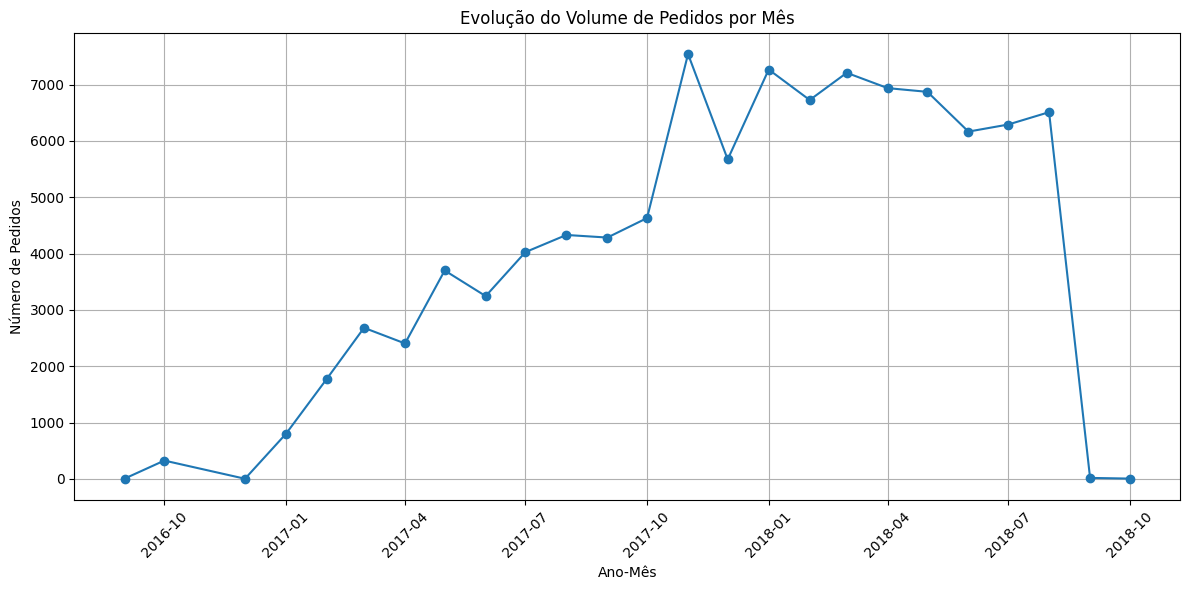

In [53]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Vamos começar carregando os arquivos CSV para um dicionário
caminho_base = '/content/drive/MyDrive/dataset_olist/'

dados = {}
lista_arquivos = [
    'olist_customers_dataset.csv',
    'olist_geolocation_dataset.csv',
    'olist_order_items_dataset.csv',
    'olist_order_reviews_dataset.csv',
    'olist_order_payments_dataset.csv',
    'olist_orders_dataset.csv',
    'olist_products_dataset.csv',
    'olist_sellers_dataset.csv'
]

print("Iniciando a importação dos dados...")

for arquivo in lista_arquivos:
    nome_tabela = arquivo.replace('.csv', '')
    dados[nome_tabela] = pd.read_csv(caminho_base + arquivo)
    print(f"Arquivo {arquivo} carregado com sucesso.")

print("\nTodos os arquivos foram carregados.\n")

# Agora vamos focar no dataset de pedidos para analisar
pedidos = dados['olist_orders_dataset'].copy()

# Convertendo a coluna de data para o tipo datetime para facilitar as análises
pedidos['order_purchase_timestamp'] = pd.to_datetime(pedidos['order_purchase_timestamp'])

# Criando uma nova coluna para ano e mês, útil para agrupar os dados
pedidos['ano_mes_compra'] = pedidos['order_purchase_timestamp'].dt.to_period('M')

# Contando a quantidade de pedidos para cada mês
total_pedidos_mes = pedidos.groupby('ano_mes_compra').size().reset_index(name='qtd_pedidos')

# Transformando o período em timestamp para facilitar a plotagem
total_pedidos_mes['ano_mes_compra'] = total_pedidos_mes['ano_mes_compra'].dt.to_timestamp()

print("Confira os primeiros registros do total de pedidos por mês:")
print(total_pedidos_mes.head())

# Agora vamos criar um gráfico para visualizar a evolução dos pedidos
plt.figure(figsize=(12, 6))
plt.plot(total_pedidos_mes['ano_mes_compra'], total_pedidos_mes['qtd_pedidos'], marker='o', linestyle='-')
plt.title('Evolução do Volume de Pedidos por Mês')
plt.xlabel('Ano-Mês')
plt.ylabel('Número de Pedidos')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




**a.1) Existe sazonalidade nas vendas?**

Média mensal de pedidos (índice sazonal):
mes
1     4034.5
2     4254.0
3     4946.5
4     4671.5
5     5286.5
6     4706.0
7     5159.0
8     5421.5
9     1435.0
10    1653.0
11    7544.0
12    2837.0
Name: total_pedidos, dtype: float64


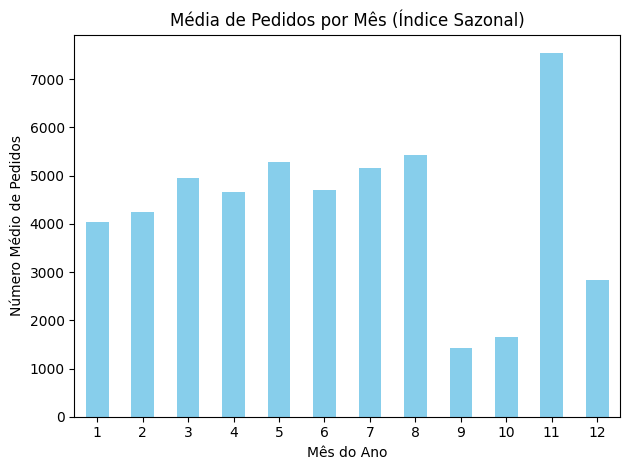

In [54]:
# Extraindo o número do mês para facilitar a análise
pedidos_por_mes['mes'] = pedidos_por_mes['order_purchase_year_month'].dt.month

# Calculando a média de pedidos para cada mês do ano, para entender a sazonalidade
media_pedidos_por_mes = pedidos_por_mes.groupby('mes')['total_pedidos'].mean()

print("Média mensal de pedidos (índice sazonal):")
print(media_pedidos_por_mes)

# Agora vamos criar um gráfico para visualizar essa média mensal de pedidos
media_pedidos_por_mes.plot(kind='bar', color='skyblue')

plt.title('Média de Pedidos por Mês (Índice Sazonal)')
plt.xlabel('Mês do Ano')
plt.ylabel('Número Médio de Pedidos')
plt.xticks(rotation=0)  # deixar os meses legíveis na horizontal
plt.tight_layout()
plt.show()


**b) Qual a distribuição do tempo de entrega dos pedidos?**

Analisando 96401 pedidos com tempo de entrega válido.


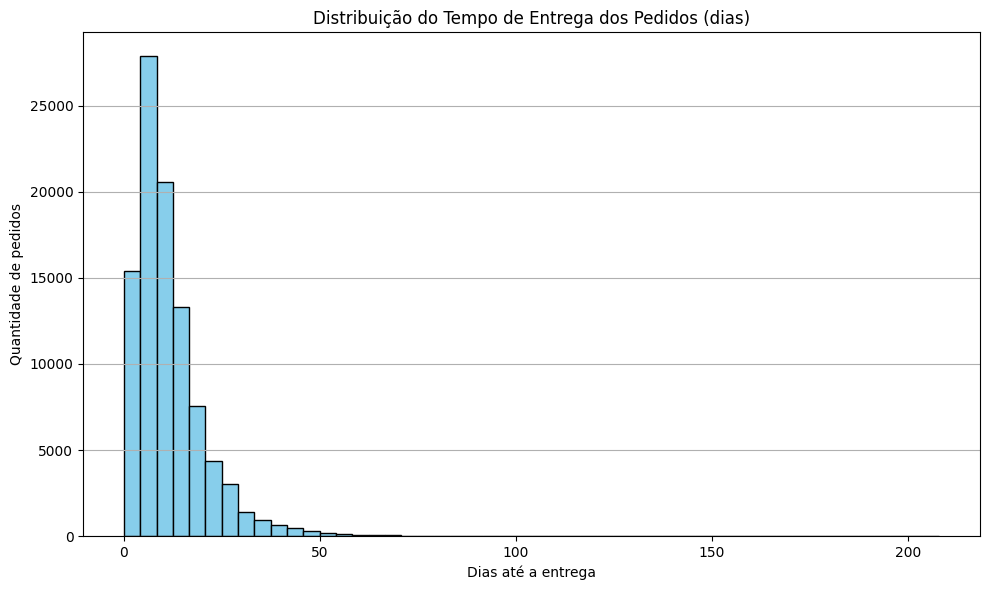

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Vamos garantir que as colunas de data estejam no formato datetime
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])

# Calculando o tempo que o pedido levou para ser entregue (em dias)
orders['tempo_entrega_dias'] = (orders['order_delivered_customer_date'] - orders['order_approved_at']).dt.days

# Filtrar para remover valores negativos ou nulos, que não fazem sentido na análise
orders = orders[orders['tempo_entrega_dias'].notnull() & (orders['tempo_entrega_dias'] >= 0)]

print(f"Analisando {len(orders)} pedidos com tempo de entrega válido.")

# Visualizando a distribuição do tempo de entrega
plt.figure(figsize=(10, 6))
plt.hist(orders['tempo_entrega_dias'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribuição do Tempo de Entrega dos Pedidos (dias)')
plt.xlabel('Dias até a entrega')
plt.ylabel('Quantidade de pedidos')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


c) Qual a relação entre o valor do frete e a distância de entrega?

Primeiro, vamos fazer uma consulta SQL para combinar as informações sobre o valor do frete, a localização do cliente e a localização do vendedor:

SELECT
    p.payment_value AS valor_frete,
    ABS(g1.geolocation_lat - g2.geolocation_lat) AS diff_lat,
    ABS(g1.geolocation_lng - g2.geolocation_lng) AS diff_lng

FROM olist_order_payments_dataset p

JOIN olist_orders_dataset o ON p.order_id = o.order_id

JOIN olist_order_items_dataset oi ON o.order_id = oi.order_id

JOIN olist_sellers_dataset s ON oi.seller_id = s.seller_id

JOIN olist_geolocation_dataset g1 ON s.seller_zip_code_prefix = g1.

geolocation_zip_code_prefix

JOIN olist_customers_dataset c ON o.customer_id = c.customer_id

JOIN olist_geolocation_dataset g2 ON c.customer_zip_code_prefix = g2.

geolocation_zip_code_prefix

No código SQl verificamos que:

- ABS(g1.geolocation_lat - g2.geolocation_lat) e ABS(g1.geolocation_lng - g2.geolocation_lng) : calculam a diferença de latitude e longitude entre o cliente e o vendedor.

- payment_value AS valor_frete traz o valor do frete.

As tabelas são relacionadas através das chaves que conectam o pedido, o vendedor e o cliente (com base no zip_code_prefix e order_id).


Arquivos carregados com sucesso!

Aqui estão os primeiros registros com a distância calculada:
                           order_id  payment_value  distancia_km
0  e481f51cbdc54678b7cc49136f2d6af7          18.12      4.177499
1  e481f51cbdc54678b7cc49136f2d6af7           2.00      4.177499
2  e481f51cbdc54678b7cc49136f2d6af7          18.59      4.177499
3  53cdb2fc8bc7dce0b6741e2150273451         141.46     13.913016
4  47770eb9100c2d0c44946d9cf07ec65d         179.12      6.229620


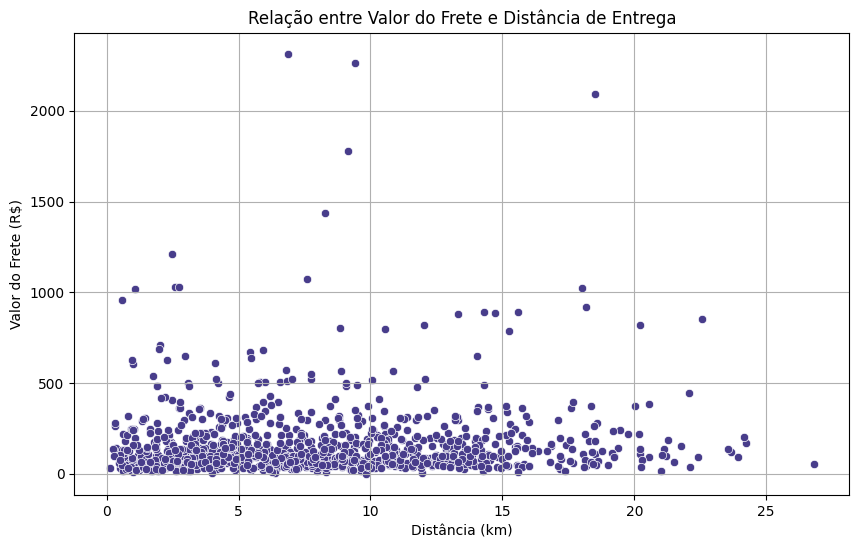

In [6]:
import pandas as pd
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo o caminho para os arquivos CSV
path = '/content/drive/MyDrive/dataset_olist/'

# Carregar os dados necessários (somente as colunas essenciais)
dados = {}
arquivos = [
    'olist_orders_dataset.csv',
    'olist_order_items_dataset.csv',
    'olist_sellers_dataset.csv',
    'olist_customers_dataset.csv',
    'olist_order_payments_dataset.csv',
    'olist_geolocation_dataset.csv'
]

# Carregar apenas as colunas necessárias
for arquivo in arquivos:
    nome_tabela = arquivo.replace('.csv', '')
    dados[nome_tabela] = pd.read_csv(path + arquivo, usecols=lambda col: col in ['order_id', 'customer_id', 'seller_id', 'order_purchase_timestamp', 'payment_value', 'order_approved_at', 'order_delivered_customer_date', 'customer_zip_code_prefix', 'seller_zip_code_prefix', 'geolocation_lat', 'geolocation_lng'])

print("Arquivos carregados com sucesso!")

# Preparando dados dos vendedores com as localizações
# Usando diretamente latitude e longitude para calcular a distância
sellers = dados['olist_sellers_dataset'][['seller_id', 'seller_zip_code_prefix']].merge(
    dados['olist_geolocation_dataset'][['geolocation_lat', 'geolocation_lng']],
    left_on='seller_zip_code_prefix',
    right_index=True,  # Usando índice para buscar a latitude e longitude
    how='left'
).rename(columns={'geolocation_lat': 'seller_lat', 'geolocation_lng': 'seller_lng'})

# Preparando dados dos clientes com as localizações
customers = dados['olist_customers_dataset'][['customer_id', 'customer_zip_code_prefix']].merge(
    dados['olist_geolocation_dataset'][['geolocation_lat', 'geolocation_lng']],
    left_on='customer_zip_code_prefix',
    right_index=True,  # Usando índice para buscar a latitude e longitude
    how='left'
).rename(columns={'geolocation_lat': 'customer_lat', 'geolocation_lng': 'customer_lng'})

# Preparando dados de pedidos e itens
order_items = dados['olist_order_items_dataset']

# Combinando todos os dados
df = dados['olist_orders_dataset'][['order_id', 'customer_id']].merge(order_items, on='order_id')
df = df.merge(sellers[['seller_id', 'seller_lat', 'seller_lng']], on='seller_id')
df = df.merge(customers[['customer_id', 'customer_lat', 'customer_lng']], on='customer_id')
df = df.merge(dados['olist_order_payments_dataset'][['order_id', 'payment_value']], on='order_id')

# Função para calcular a distância geográfica entre cliente e vendedor
def calc_distance(row):
    if pd.notnull(row['seller_lat']) and pd.notnull(row['seller_lng']) and pd.notnull(row['customer_lat']) and pd.notnull(row['customer_lng']):
        return geodesic((row['seller_lat'], row['seller_lng']), (row['customer_lat'], row['customer_lng'])).km
    return None

# Calculando a distância para cada pedido
df['distancia_km'] = df.apply(calc_distance, axis=1)

# Exibindo os primeiros registros para garantir que a distância foi calculada
print("\nAqui estão os primeiros registros com a distância calculada:")
print(df[['order_id', 'payment_value', 'distancia_km']].head())

# Vamos agora visualizar a relação entre a distância e o valor do frete

# Selecionando uma amostra para evitar sobrecarga de dados
df_sample = df.sample(1000, random_state=42)  # Seleciona 1000 amostras aleatórias para plotar

# Gráfico de dispersão entre valor do frete e distância de entrega
plt.figure(figsize=(10,6))
sns.scatterplot(x='distancia_km', y='payment_value', data=df_sample, color='darkslateblue')
plt.title('Relação entre Valor do Frete e Distância de Entrega')
plt.xlabel('Distância (km)')
plt.ylabel('Valor do Frete (R$)')
plt.grid(True)
plt.show()


**d) Quais são as categorias de produtos mais vendidas em termos de faturamento?**

Para responder a essa pergunta, precisamos:

-Agrupar os produtos por categoria.

-Somar o faturamento de cada categoria, que pode ser obtido multiplicando a quantidade vendida pelo valor unitário.

-Plotar um gráfico de barras para visualizar as categorias com maior faturamento.


O O código para o SQL:

SELECT
    p.product_category_name,
    SUM(oi.price * oi.order_item_id) AS faturamento

FROM olist_order_items_dataset oi

JOIN olist_products_dataset p ON oi.product_id = p.product_id

JOIN olist_order_payments_dataset op ON oi.order_id = op.order_id

GROUP BY p.product_category_name

ORDER BY faturamento DESC


In [14]:
import pandas as pd

# Definindo o caminho onde estão localizados os arquivos CSV no Google Drive
path = '/content/drive/MyDrive/dataset_olist/'

# Lista com os nomes dos arquivos CSV que vamos carregar
# Agora incluindo o arquivo 'olist_products_dataset.csv', que contém as informações dos produtos
arquivos = [
    'olist_orders_dataset.csv',  # Dados dos pedidos
    'olist_order_items_dataset.csv',  # Itens de cada pedido
    'olist_sellers_dataset.csv',  # Informações sobre os vendedores
    'olist_customers_dataset.csv',  # Dados dos clientes
    'olist_order_payments_dataset.csv',  # Pagamentos realizados nos pedidos
    'olist_geolocation_dataset.csv',  # Informações de geolocalização
    'olist_products_dataset.csv'  # Dados dos produtos (adicionado agora)
]

# Vamos criar um dicionário para armazenar os dados de cada arquivo CSV
dados = {}

# Para cada arquivo na lista de arquivos, vamos carregar o conteúdo e armazenar no dicionário 'dados'
for arquivo in arquivos:
    nome_tabela = arquivo.replace('.csv', '')  # Removendo a extensão '.csv' para usar como chave no dicionário
    dados[nome_tabela] = pd.read_csv(path + arquivo)  # Lendo o arquivo CSV e armazenando no dicionário 'dados'

# Exibir as chaves do dicionário 'dados' para verificar se todos os arquivos foram carregados corretamente
# O comando print vai mostrar o nome das tabelas carregadas, para confirmarmos que tudo está certo
print("Arquivos carregados com sucesso! As tabelas carregadas são:")
print(dados.keys())  # Mostra as chaves (nomes das tabelas) para conferirmos



Arquivos carregados com sucesso! As tabelas carregadas são:
dict_keys(['olist_orders_dataset', 'olist_order_items_dataset', 'olist_sellers_dataset', 'olist_customers_dataset', 'olist_order_payments_dataset', 'olist_geolocation_dataset', 'olist_products_dataset'])


Arquivos carregados com sucesso! As tabelas carregadas são:
dict_keys(['olist_orders_dataset', 'olist_order_items_dataset', 'olist_sellers_dataset', 'olist_customers_dataset', 'olist_order_payments_dataset', 'olist_geolocation_dataset', 'olist_products_dataset'])

Verificando as colunas do dataset de itens de pedido (order items):
Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

Colunas do DataFrame combinado (df):
Index(['order_id', 'customer_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'seller_lat',
       'seller_lng', 'customer_lat', 'customer_lng', 'payment_value'],
      dtype='object')


<ipython-input-15-402e72273317>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='faturamento', y='product_category_name', data=faturamento_categoria, palette='Blues_d')


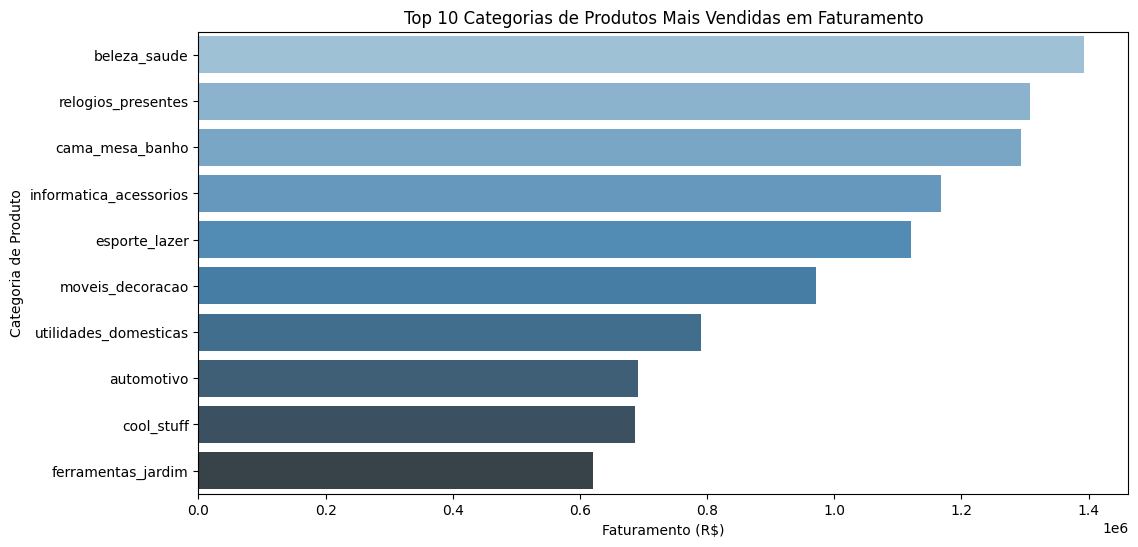

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caminho onde os arquivos CSV estão localizados no Google Drive
path = '/content/drive/MyDrive/dataset_olist/'

# Lista com os nomes dos arquivos CSV que vamos carregar
# Cada arquivo contém dados importantes sobre os pedidos, produtos, clientes, entre outros
arquivos = [
    'olist_orders_dataset.csv',  # Dados dos pedidos
    'olist_order_items_dataset.csv',  # Itens de cada pedido
    'olist_sellers_dataset.csv',  # Informações sobre os vendedores
    'olist_customers_dataset.csv',  # Dados dos clientes
    'olist_order_payments_dataset.csv',  # Pagamentos realizados nos pedidos
    'olist_geolocation_dataset.csv',  # Dados de geolocalização (latitude, longitude)
    'olist_products_dataset.csv'  # Dados dos produtos (categorias, preços)
]

# Dicionário onde os dados de cada arquivo serão armazenados
dados = {}

# Vamos carregar os dados dos arquivos CSV e armazená-los no dicionário 'dados'
for arquivo in arquivos:
    nome_tabela = arquivo.replace('.csv', '')  # Remover a extensão '.csv' para usar como chave
    dados[nome_tabela] = pd.read_csv(path + arquivo)  # Carregar o arquivo e adicionar ao dicionário

# Exibir os nomes das tabelas carregadas para garantir que os dados foram carregados corretamente
print("Arquivos carregados com sucesso! As tabelas carregadas são:")
print(dados.keys())  # Lista das tabelas carregadas no dicionário

# Verificando se a coluna 'product_id' está na tabela 'olist_order_items_dataset'
print("\nVerificando as colunas do dataset de itens de pedido (order items):")
print(dados['olist_order_items_dataset'].columns)  # Verificar se a coluna 'product_id' existe na tabela 'order_items'

# Agora vamos preparar os dados dos vendedores e clientes, adicionando as localizações de latitude e longitude
# Primeiro, combinamos os dados dos vendedores com as informações de geolocalização
sellers = dados['olist_sellers_dataset'][['seller_id', 'seller_zip_code_prefix']].merge(
    dados['olist_geolocation_dataset'][['geolocation_lat', 'geolocation_lng']],  # Latitude e Longitude
    left_on='seller_zip_code_prefix',  # Usamos o 'seller_zip_code_prefix' para fazer a junção
    right_index=True,  # Usamos o índice para combinar as geolocalizações
    how='left'  # Fazemos a junção à esquerda (mantemos todos os vendedores)
).rename(columns={'geolocation_lat': 'seller_lat', 'geolocation_lng': 'seller_lng'})  # Renomeamos as colunas

# Agora, fazemos o mesmo para os clientes
customers = dados['olist_customers_dataset'][['customer_id', 'customer_zip_code_prefix']].merge(
    dados['olist_geolocation_dataset'][['geolocation_lat', 'geolocation_lng']],  # Latitude e Longitude
    left_on='customer_zip_code_prefix',  # Usamos o 'customer_zip_code_prefix' para fazer a junção
    right_index=True,  # Usamos o índice para combinar as geolocalizações
    how='left'  # Fazemos a junção à esquerda (mantemos todos os clientes)
).rename(columns={'geolocation_lat': 'customer_lat', 'geolocation_lng': 'customer_lng'})  # Renomeamos as colunas

# Agora, vamos preparar os dados dos pedidos e itens de pedidos
order_items = dados['olist_order_items_dataset']

# Combinamos todos os dados em um único DataFrame (df) para facilitar a análise
df = dados['olist_orders_dataset'][['order_id', 'customer_id']].merge(order_items, on='order_id', how='left')
df = df.merge(sellers[['seller_id', 'seller_lat', 'seller_lng']], on='seller_id', how='left')
df = df.merge(customers[['customer_id', 'customer_lat', 'customer_lng']], on='customer_id', how='left')
df = df.merge(dados['olist_order_payments_dataset'][['order_id', 'payment_value']], on='order_id', how='left')

# Exibindo as colunas de 'df' para garantir que o merge foi feito corretamente e que temos 'product_id'
print("\nColunas do DataFrame combinado (df):")
print(df.columns)  # Verificar se o DataFrame contém a coluna 'product_id'

# Agora, vamos calcular o faturamento por categoria de produto
# Fazemos um merge entre os dados de produtos (categoria e 'product_id') e os pedidos
df_produtos = df.merge(dados['olist_products_dataset'][['product_id', 'product_category_name']], on='product_id', how='left')

# Calculando o faturamento para cada item (preço * quantidade)
df_produtos['faturamento'] = df_produtos['price'] * df_produtos['order_item_id']

# Agrupando por categoria de produto e somando o faturamento
faturamento_categoria = df_produtos.groupby('product_category_name')['faturamento'].sum().reset_index()

# Ordenando por faturamento e selecionando as top 10 categorias com maior faturamento
faturamento_categoria = faturamento_categoria.sort_values(by='faturamento', ascending=False).head(10)

# Plotando o gráfico de barras para visualizar as categorias de produtos mais vendidas em faturamento
plt.figure(figsize=(12,6))
sns.barplot(x='faturamento', y='product_category_name', data=faturamento_categoria, palette='Blues_d')
plt.title('Top 10 Categorias de Produtos Mais Vendidas em Faturamento')
plt.xlabel('Faturamento (R$)')
plt.ylabel('Categoria de Produto')
plt.show()


 ** e) Quais estados brasileiros possuem o maior valor médio de pedido?**   

 Como fica no SQL:

 SELECT

    c.customer_state,
    AVG(op.payment_value) AS valor_medio_pedido
FROM olist_orders_dataset o

JOIN olist_customers_dataset c ON o.customer_id = c.customer_id

JOIN olist_order_payments_dataset op ON o.order_id = op.order_id

GROUP BY c.customer_state

ORDER BY valor_medio_pedido DESC





 Para Calcular o Valor Médio de Pedido por Estado:

Vamos fazer isso no Python, utilizando os dados carregados. O código irá:

Unir as tabelas de pedidos e clientes para associar cada pedido ao estado do cliente.

Calcular a média do valor do pedido por estado.

Gerar um gráfico para visualizar os estados com os maiores valores médios de pedido.

<ipython-input-16-3ad842313dd7>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='payment_value', y='customer_state', data=media_pedido_estado, palette='coolwarm')


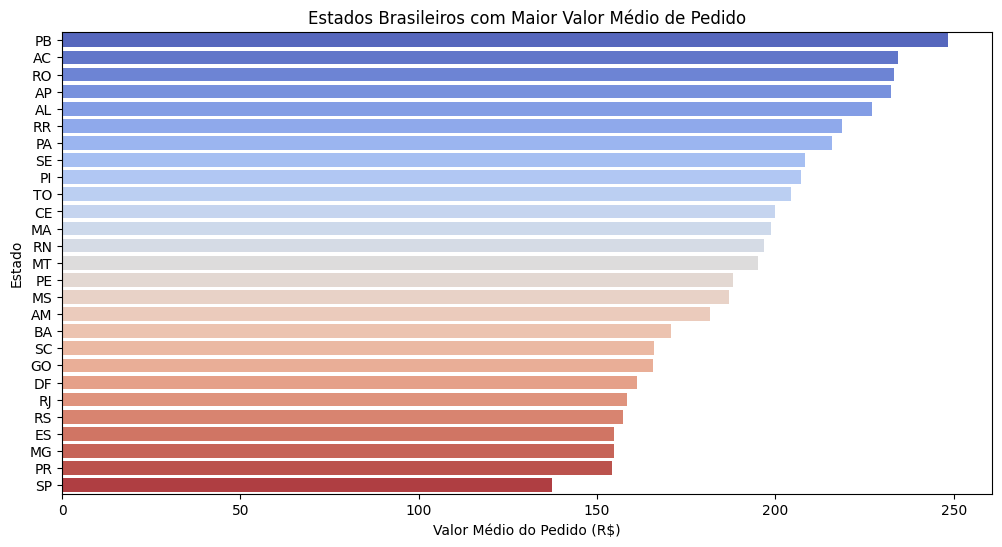

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo o caminho para os arquivos CSV
path = '/content/drive/MyDrive/dataset_olist/'

# Carregar os dados necessários (somente as colunas essenciais)
dados = {}
arquivos = [
    'olist_orders_dataset.csv',
    'olist_order_items_dataset.csv',
    'olist_sellers_dataset.csv',
    'olist_customers_dataset.csv',
    'olist_order_payments_dataset.csv',
    'olist_geolocation_dataset.csv',
    'olist_products_dataset.csv'
]

# Carregar os arquivos CSV
for arquivo in arquivos:
    nome_tabela = arquivo.replace('.csv', '')
    dados[nome_tabela] = pd.read_csv(path + arquivo)

# Preparando os dados dos clientes e pedidos
df_estado = dados['olist_orders_dataset'].merge(
    dados['olist_customers_dataset'][['customer_id', 'customer_state']],
    on='customer_id', how='left'
)

df_estado = df_estado.merge(
    dados['olist_order_payments_dataset'][['order_id', 'payment_value']],
    on='order_id', how='left'
)

# Calcular o valor médio de pedido por estado
media_pedido_estado = df_estado.groupby('customer_state')['payment_value'].mean().reset_index()

# Ordenar os estados por valor médio de pedido
media_pedido_estado = media_pedido_estado.sort_values(by='payment_value', ascending=False)

# Plotando gráfico de barras para visualizar os estados com maior valor médio de pedido
plt.figure(figsize=(12,6))
sns.barplot(x='payment_value', y='customer_state', data=media_pedido_estado, palette='coolwarm')
plt.title('Estados Brasileiros com Maior Valor Médio de Pedido')
plt.xlabel('Valor Médio do Pedido (R$)')
plt.ylabel('Estado')
plt.show()


**############################################################################**


**3. Solução de Problemas de Negócio**





**############################################################################**

**4. Visualização e Dashboards**

1. Um dashboard geral que mostre a evolução das vendas ao longo do tempo, com filtros por estado e categoria de produto.